# Assignment 3: Working with an ANN

This assignment contributes (up to) 20 points (out of 100 possible) of the final grade.
Please adhere the these rules while solving the assignment:
* Please hand in only this jupyter notebook. If you work on your own computer make sure, it also works on the provided server.
* Include the results, not only the code.
* No changes above the respective task. The previous parts must not be changed for the current assignment. Use inheritance or copy the parts you want to change. But existing code can be called/used.
* All explainintion/discussions in your own words.

Some hints:
* Start early, running the complete notebook can take hours
* Too avoid having to "babysit" the notebook try to put each task in one single cell. So you do not need to pay attention when some intermediate results are finished, to be able to run the next cell before the "idle timeout" catches you.
* Develop your code with a subset of the data, so you are quite confident, that the code executes completely.

The assignment is based on the already known ANN (Week 10):

In [43]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special

# class definition for the core structure
class neuralNetwork:
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass


    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

## Task 1: Get & run the full data set (2 Point)

Get the full MNIST training & test dataset. Then train and test the ANN with the same settings as in the exercise (784 input nodes, 200 hidden nodes, 10 output nodes, learning rate 0.1, 5 epoch).

Code:

In [44]:
import time
def myfunction_task1(input_nodes, hidden_nodes, output_nodes, learning_rate, epochs, instance_name):
    
    t1 = time.time()                                                                # Starting time              
    # number of input, hidden and output nodes
    inp_nodes = input_nodes
    hid_nodes = hidden_nodes
    out_nodes = output_nodes

    # learning rate
    l_r = learning_rate                                                             # Learning rate value

    # create instance of neural network
    # I have used different name of every instance of neural network to prevent data overwriting!
    instance_name = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()


    # train the neural network

    # epochs is the number of times the training data set is used for training
    epoch = 5                                          

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            instance_name.train(inputs, targets)
            pass
        pass


    # Loading the test data
    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = instance_name.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass

        pass

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    print ("Performance is = ", scorecard_array.sum() / scorecard_array.size)

    t2 = time.time()                                                                    #Ending time
    print('Time for the completing whole task:', round(t2-t1,2), 'seconds')

In [36]:
myfunction_task1(784, 200, 10, 0.1, 5, 'n_1')

Performance is =  0.9714
Time for the completing whole task: 292.12 seconds


**Note:** I have made a function for task 1 'myfunction_task1' because I have used this task 1 function in Task 6 also to run it and compare the results with task 6 results. 

**Note:** All the examples in this Assignment were run on following configuration:
intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, 6 cores

Please give a short explanation (in your own words) of the differences in the "performance" (proportion of correct classifications) compared with the smaller dataset in the exercise:

**ANSWER**

(1) In smaller data, there was 0.6 performance rate whereas we got 0.9714 performance rate on larger data. Therefore, there is 62% increase in performance (proportion of correct classifications) when we use larger data.

(2) Data size is a very crucial part of training neural networks. Larger datasets can help us better learn model parameters and improve the optimization process and imparts generalization. Because of large diversified data, this model is now more experienced and more generalized to new unseen data. Earlier it was only restricted to 600 therefore, it was not diversified. Large dataset helps us avoid overfitting and generalizes better as it captures the inherent data distribution more effectively.

## Task 2: Influence of the learning rate (2 Points)

Test the influence of learning rates. Start with 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0. Other parameters are the same as in task 1.
After the first (successful) run add two additional values to get a more detailed picture of the area with the best performance.
Use a graph to visualize the result.

Code:

In [6]:
###Function to plot graphs
import matplotlib.pyplot as plt

def myplot_function(m, n, x, y, z):
    plt.plot(m,n, marker = 'o')                 # m and n are given x and y values respectively
    plt.xlabel(x)                               # x is a name of X axis of graph
    plt.ylabel(y)                               # y is a name of Y axis of graph 
    plt.title(z)                                # z is a title of the graph  
    plt.show()

Learning rates are: [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0]
Performance scorecard is: [0.9529, 0.9743, 0.9693, 0.9565, 0.9554, 0.9343, 0.8933, 0.8412]
our Maximum performance is 0.9743


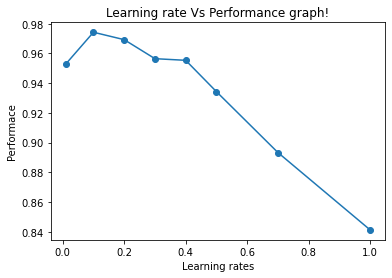

Our maximum performance occurs at learning rate: 0.1 so we will put two additional values of learning rate around this in next cell.
Time for the completing this task is: 2387.4115738868713 seconds


In [9]:
t3 = time.time()
import matplotlib.pyplot as plt
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0]                        # List of learning rate value           

performace_scorecard = []

for i in range(len(learning_rate)):
    # create instance of neural network
    # I have used different name of every instance of neural network to prevent data overwriting!
    n_2 = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate[i])

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()


    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n_2.train(inputs, targets)
            pass
        pass

    # Loading the test data
    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n_2.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass

        pass

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() / scorecard_array.size)
    performance = scorecard_array.sum() / scorecard_array.size

    performace_scorecard.append(performance)
    
print('Learning rates are:', learning_rate)
print('Performance scorecard is:', performace_scorecard)

max_value = max(performace_scorecard)
print('our Maximum performance is', max_value)

#Plotting a graph using 'myplot_function' function created above
myplot_function(learning_rate, performace_scorecard, 'Learning rates', 'Performace', 'Learning rate Vs Performance graph!')

max_value = max(performace_scorecard)
max_index = performace_scorecard.index(max_value)
print('Our maximum performance occurs at learning rate:', learning_rate[max_index], 'so we will put two additional values of learning rate around this in next cell.')

t4 = time.time()
print('Time for the completing this task is:', t4-t3, 'seconds')

**Note:** I have not rounded the time upto 2 decimal because in these task, I have only checked the time for my personal interest. I have rounded the time upto 2 decimal in task 1, 4, 5, and 6 because of the importance of the time.  

Learning rates are: [0.01, 0.07, 0.1, 0.15, 0.2, 0.3, 0.4]
Performance scorecard is: [0.9524, 0.9744, 0.9729, 0.972, 0.9685, 0.9588, 0.9479]


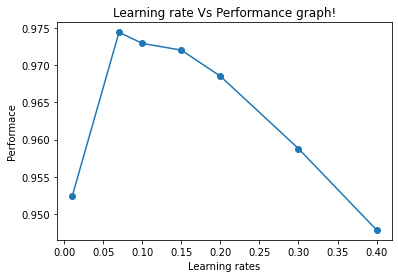

Time for the task: 2124.470781326294 seconds


In [15]:
##### In this cell, two addtional learning rates are added around where maximum performance occured in above section.#####

t5 = time.time()
import matplotlib.pyplot as plt
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

learning_rate=[0.01, 0.07, 0.1, 0.15, 0.2, 0.3, 0.4]                       #0.07 and 0.15 are additional Learning rates
# Learning rates '0.5', '0.7', '1.0' are removed due to low performance rates as already shown in Figure plotted above 

performace_scorecard_1 = []                                                # initializing 'performance_scorecard 'list which will store performance rate for this task

for i in range(len(learning_rate)):
    # create instance of neural network
    # I have used different name of every instance of neural network to prevent data overwriting!
    n_21 = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate[i])

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()


    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n_21.train(inputs, targets)
            pass
        pass

    # Loading the test data
    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n_21.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass

        pass

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    #print ("performance = ", scorecard_array.sum() / scorecard_array.size)
    performance = scorecard_array.sum() / scorecard_array.size

    performace_scorecard_1.append(performance)
    
print('Learning rates are:', learning_rate)
print('Performance scorecard is:', performace_scorecard_1)

#Plotting a graph using 'myplot_function' function created above
myplot_function(learning_rate, performace_scorecard_1, 'Learning rates', 'Performace', 'Learning rate Vs Performance graph!')

t6 = time.time()
print('Time for the task:', t6-t5, 'seconds')  

Try to give a short hypothesis why it behaves as observed:

**ANSWER:-**

(1) The amount that the weights are updated during training is referred to as the step size or the “learning rate.” The learning rate hyperparameter controls the rate or speed at which the model learns. 

(2) In the first figure, our highest performance occurs at 0.1 and it starts decreasing. Therefore, in the next cell, two other learning rates 0.07 and 0.15 are added around 0.1 learning rate and later I cheked the performance. 

(3) In the second figure, now highest performance occurs at learning rate 0.07 and later, performance decreases gradually. Our worst performance, 0.9479 occurs on 0.4 learning rate. Second lowest performance occurs on 0.1 learning rate. 

(4) In first figure above, when learning rates increase from 0.07, performance decreases gradually. The reason behind it is, a learning rate that is too large will result in weight updates that will be too large and the performance of the model (such as its loss on the training dataset) will oscillate over training epochs. And large learning rate can cause the model to converge too quickly to a **suboptimal** solution. 

(5) In same Figure, When learning rate is below 0.07, that means on learning rate 0.01, performance decreases there also. This is because, a learning rate that is too small may never converge or may get stuck on a **suboptimal** solution.

## Task 3: Influence of number of epochs (4 Point)

Take five leaning rates from task 2, that had shown reasonable performance, and test each of them with 1, 3, 5, 10, 50 epochs.
Visualize the results (e.g. a heatmap).

Code:

In [16]:
#Finding 5 learning rates which has highest performance from previous task

import numpy as np
lr = np.array(learning_rate)
performance = np.array(performace_scorecard_1)
print(lr)
print(performance)
a = 5

indices = (-performance).argsort()[:a]

learning_rate = []
for i in range(len(indices)):
    le_ra = lr[indices[i]]
    learning_rate.append(le_ra)

learning_rate.sort()
    
print('Top 5 learning rates are', learning_rate, 'which we will use to run next cell below.')

[0.01 0.07 0.1  0.15 0.2  0.3  0.4 ]
[0.9524 0.9744 0.9729 0.972  0.9685 0.9588 0.9479]
Top 5 learning rates are [0.07, 0.1, 0.15, 0.2, 0.3] which we will use to run next cell below.


In [17]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

t9 = time.time()
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

epoch_time_testing = []                                                          #to store all time values (in seconds) in a single row
oneD_array = []                                                                  #to store all performance values in a single row
for i in range(len(learning_rate)):
    performance_scorecard_2 = []                                                 #to store performance values of every learningr rate in a single row
     
    # create instance of neural network
    # I have used different name of every instance of neural network to prevent data overwriting!
    n_3 = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate[i])

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()


    # train the neural network

    # epochs is the number of times the training data set is used for training
    # I have changed epoch from '50' to epoch '30' in the 'epoch_test_container' below because after epoch 30, performance is degrading already and 50 epochs consumes more time as well.
    epoch_test_container = [1, 3, 5, 10, 30]                                     # initializing every Epochs values in a list     
    for j in range(len(epoch_test_container)):
        epochs = epoch_test_container[j]
        t7 = time.time()
        for e in range(epochs):
            # go through all records in the training data set
            for record in training_data_list:
                # split the record by the ',' commas
                all_values = record.split(',')
                # scale and shift the inputs
                inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
                # create the target output values (all 0.01, except the desired label which is 0.99)
                targets = numpy.zeros(output_nodes) + 0.01
                # all_values[0] is the target label for this record
                targets[int(all_values[0])] = 0.99
                n_3.train(inputs, targets)
                pass
            pass

        # Loading the test data
        # load the mnist test data CSV file into a list
        test_data_file = open("mnist_test.csv", 'r')
        test_data_list = test_data_file.readlines()
        test_data_file.close()

        # scorecard for how well the network performs, initially empty
        scorecard = []

        # go through all the records in the test data set
        for record in test_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # correct answer is first value
            correct_label = int(all_values[0])
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # query the network
            outputs = n_3.query(inputs)
            # the index of the highest value corresponds to the label
            label = numpy.argmax(outputs)
            # append correct or incorrect to list
            if (label == correct_label):
                #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
                # network's answer matches correct answer, add 1 to scorecard
                scorecard.append(1)
            else:
                #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
                # network's answer doesn't match correct answer, add 0 to scorecard
                scorecard.append(0)
                pass

            pass
        
        # calculate the performance score, the fraction of correct answers
        scorecard_array = numpy.asarray(scorecard)
        #print ("performance = ", scorecard_array.sum() / scorecard_array.size)

        performance = scorecard_array.sum() / scorecard_array.size

        oneD_array.append(performance)                                         # storing performance values in an array
        performance_scorecard_2.append(performance)                            # storing performance values in a scorecard array
        t8 = time.time()
        epoch_time_testing.append(t8-t7)                                       # storing testing time in an array
    
    print('performance scorecard for learning rate', learning_rate[i], 'is:', performance_scorecard_2, 'for the Epoch 1, 3, 5, 10, 30 respectively')   #performance for epochs[1, 3, 5, 10, 30]

t10 = time.time()
print('Time for the completing whole task:', t10-t9, 'seconds')        

performance scorecard for learning rate 0.07 is: [0.9489, 0.9736, 0.9768, 0.9755, 0.9708] for the Epoch 1, 3, 5, 10, 30 respectively
performance scorecard for learning rate 0.1 is: [0.9545, 0.9719, 0.9752, 0.9725, 0.9645] for the Epoch 1, 3, 5, 10, 30 respectively
performance scorecard for learning rate 0.15 is: [0.9595, 0.9707, 0.9723, 0.9702, 0.961] for the Epoch 1, 3, 5, 10, 30 respectively
performance scorecard for learning rate 0.2 is: [0.9595, 0.9676, 0.9672, 0.9625, 0.9543] for the Epoch 1, 3, 5, 10, 30 respectively
performance scorecard for learning rate 0.3 is: [0.9575, 0.9612, 0.9595, 0.9526, 0.9515] for the Epoch 1, 3, 5, 10, 30 respectively
Time for the completing whole task: 15184.809830665588 seconds


Dataframe generated of performances from epochs and learning rates is as below
           1       3       5      10      30
0.07  0.9489  0.9736  0.9768  0.9755  0.9708
0.10  0.9545  0.9719  0.9752  0.9725  0.9645
0.15  0.9595  0.9707  0.9723  0.9702  0.9610
0.20  0.9595  0.9676  0.9672  0.9625  0.9543
0.30  0.9575  0.9612  0.9595  0.9526  0.9515


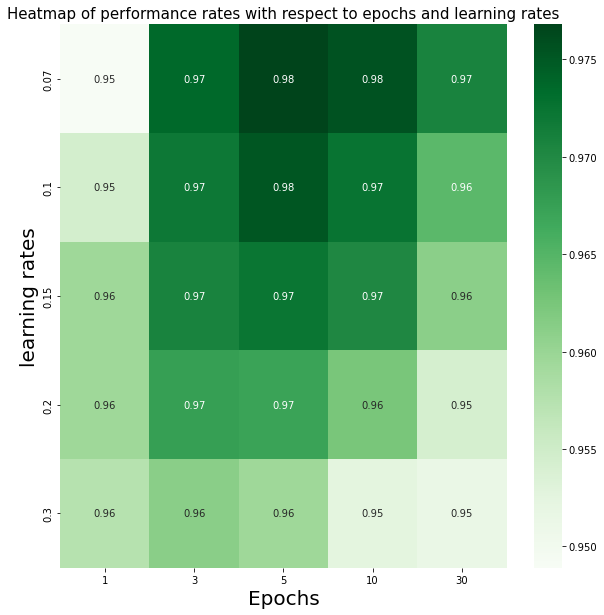

In [18]:
###....Plotting a Heatmap to visulize the results....###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

my_array = np.array(oneD_array)                                                        #Converting OneD_array from List to numpy array
twoD_array = my_array.reshape(5,5)                                                     #Converting FROM One dimensional array TO two Dimensional array
#print('Two Dimensional Array for performances is:', twoD_array)
df1 = pd.DataFrame(twoD_array)                                                         #Converting two dimensional array into a Panda's Dataframe
df1.columns = ['1', '3', '5', '10', '30']                                              #Writing a column names in a obtained Dataframe 
df1.index = (learning_rate)                                                            #Making 'index' column with a values of learning rates 
print('Dataframe generated of performances from epochs and learning rates is as below')
print(df1)

plt.figure(figsize=(10,10))                                                            #Setting siez 10 X 10 of a Heatmap 
df_heatmap = sns.heatmap(df1, annot=True, cmap="Greens")                               #Passing Dataframe in a Heatmap syntax
plt.title('Heatmap of performance rates with respect to epochs and learning rates', fontsize = 15) # title with fontsize 20
plt.xlabel('Epochs', fontsize = 20)                                                    # x-axis label with fontsize 15
plt.ylabel('learning rates', fontsize = 20)                                            # y-axis label with fontsize 15

plt.show()

Dataframe generated of time (in seconds) taken by every epochs and learning rates is as below
              1           3           5          10           30
0.07  65.755208  193.881621  329.551640  646.044649  1936.669022
0.10  66.721465  196.717407  324.353861  598.521381  1792.205680
0.15  62.662712  184.246958  306.421028  609.586647  1831.129441
0.20  62.968539  185.110576  306.824906  612.094738  1832.939854
0.30  62.987599  185.337213  308.320397  614.116340  1868.230540


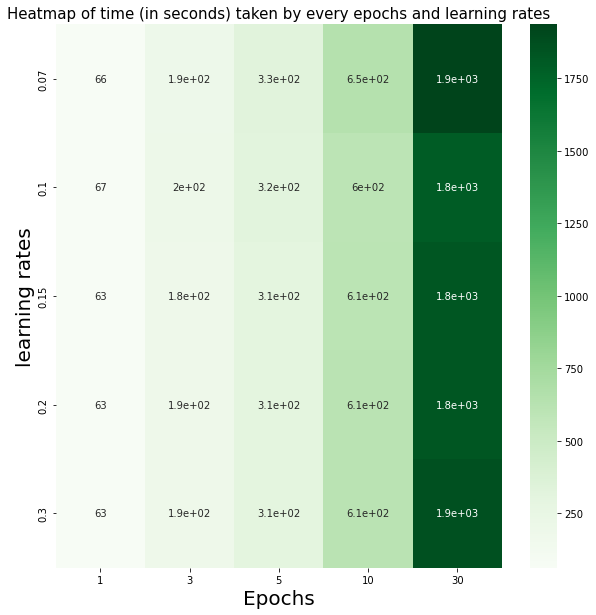

In [19]:
###....Plotting a Heatmap to visulize the time taken to find performance by every epoch and learning rate....###
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

epoch_array = np.array(epoch_time_testing)                                 #Converting 'epoch_array' from List to numpy array
epoch_twoD_array = epoch_array.reshape(5,5)                                #Converting FROM numpy One dimensional arraY TO numpy  two Dimensional array
df2 = pd.DataFrame(epoch_twoD_array)                                       #Converting two dimensional array into a Panda's Dataframe
df2.columns = ['1', '3', '5', '10', '30']
df2.index = (learning_rate)
print('Dataframe generated of time (in seconds) taken by every epochs and learning rates is as below')
print(df2)

plt.figure(figsize=(10,10))
df_heatmap = sns.heatmap(df2, annot=True, cmap="Greens")
plt.title('Heatmap of time (in seconds) taken by every epochs and learning rates', fontsize = 15) # title with fontsize 20
plt.xlabel('Epochs', fontsize = 20) # x-axis label with fontsize 15
plt.ylabel('learning rates', fontsize = 20) # y-axis label with fontsize 15

plt.show()

Discuss the observed results:

**Observations:-**

(1) I have chosen best 5 learning rate from task 3 and run this task using each learning rate with every epoch. 

(2) It can be noticed that, performance increases as number of epochs increases. As the heatmap of performance with respect to learning rate and epoch shows, our highest performance, 0.98 occurs at learning rate 0.07 learning rate with 5 and 10 epoch and 0.1 learning rate with 5 epoch. After 5 epoch, performance decreases again in epoch 10 except in learning rate 0.07 and in epoch 30. Worst performance, 0.95 can be seen in 0.07 learning rate & 1 epoch, 0.3 learning rate & 10 and 30 epoch, 0.2 learning rate and 30 epoch.

(3) In the heatmap of performance with respect to learning rate and epoch, it can be seen that, epoch 10 takes almost double time to calculate than epoch 5 and still give same performance as epoch 5 gives. Therefore 0.07 learning rate and 5 epoch can be the best combination because it give highest performance in a comparatively less computing time.   

## Task 4: Size of the hidden layer (3 Points)

Get a good combination of learning rate and number of epochs from task 3 (good results, not too much computing time) and try at least 10 different sizes of the hidden layer in the range of 5 to 1000.
Output the performance and the time the training and testing took.

Code:

In [4]:
# ---> From above task, we can clearly see that, we got our best performance rate 0.98 for learning rate 0.07 while using epochs
# 5 and 10 and on 0.1 and 5 as learning rate and epoch respectively. 

# ---> We can see in the time plot above that program takes double time to execute it with epoch 10 than with epoch 5. Moreover,
# epoch 5 & epoch 10 both are giving same performance rate (0.98). Therefore using epoch 5 is less time consuming.

# ---> As our best combination, I have chosen 0.07 and 5 as learning rate and epoch respectively which I have used below in a task 4. 

In [5]:
#from above task (task 3), I have selected learning rate 0.07 and epoch 5 as a best combination.

import pandas as pd
import numpy as np
import seaborn as sns
import time

t11 = time.time()
# number of input, hidden and output nodes
input_nodes = 784
output_nodes = 10

hidden_nodes = [5, 50, 150, 300, 400, 500, 600, 700, 800, 900, 1000]       # Container of Hidden layers as List          
oneDime_array_trainingt = []                                               # initialization of list, which will store training time
oneDime_array_testingt = []                                                # initialization of list, which will store testing time
performace_scorecard_3 = []                                                # initialization of list, which will performance rates

for k in range(len(hidden_nodes)):
    # learning rate
    learning_rate = 0.07

    # create instance of neural network
    # I have used different name of every instance of neural network to prevent data overwriting!
    n_4 = neuralNetwork(input_nodes,hidden_nodes[k],output_nodes, learning_rate)
    
    t13 = time.time()
    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()


    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = 5

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(output_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            n_4.train(inputs, targets)
            pass
        pass
    t14 = time.time()
    # Loading the test data
    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs = n_4.query(inputs)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass

        pass

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    performance = scorecard_array.sum() / scorecard_array.size
    performace_scorecard_3.append(performance)
    print('-------------------------------------------------------------------------------------------------------')
    print ("performance for Hidden nodes",hidden_nodes[k], 'is:', performance)
    t15 = time.time()
    print('training time for Hidden nodes',hidden_nodes[k], 'is:', round(t14-t13,2), 'seconds')
    oneDime_array_trainingt.append(round(t14-t13,2))
    print('testing time for Hidden nodes',hidden_nodes[k], 'is:', round(t15-t14,2), 'seconds')
    oneDime_array_testingt.append(round(t15-t14,2))
    print('-------------------------------------------------------------------------------------------------------')

print('Summary of the task is as below,')
print('Learning rate is:', learning_rate)
print('Epichs is:', epochs)
print('Hidden nodes are:', hidden_nodes)
print('Performance scorecard is:', performace_scorecard_3)
print('Training Time taken in seconds by Hidden layers according to different hidden nodes is:', oneDime_array_trainingt)
print('Testing Time taken in seconds by Hidden layers according to different hidden nodes is:', oneDime_array_testingt)

t12 = time.time()
print('Time for the completing whole task:', round(t12-t11,2), 'seconds')

-------------------------------------------------------------------------------------------------------
performance for Hidden nodes 5 is: 0.7173
training time for Hidden nodes 5 is: 44.34 seconds
testing time for Hidden nodes 5 is: 1.31 seconds
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
performance for Hidden nodes 50 is: 0.9589
training time for Hidden nodes 50 is: 81.73 seconds
testing time for Hidden nodes 50 is: 1.86 seconds
-------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------
performance for Hidden nodes 150 is: 0.9719
training time for Hidden nodes 150 is: 130.81 seconds
testing time for Hidden nodes 150 is: 1.94 seconds
--------------------------------------------

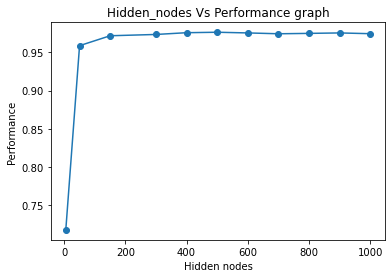

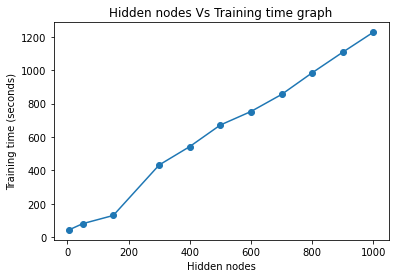

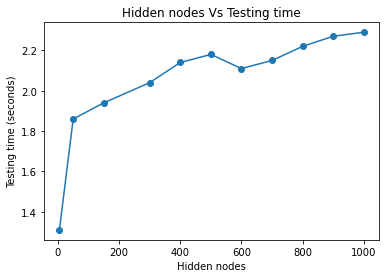

In [7]:
# plotting the graph of Hidden nodes Vs Performance
myplot_function(hidden_nodes, performace_scorecard_3, 'Hidden nodes', 'Performance', 'Hidden_nodes Vs Performance graph')

# plotting the graph of Hidden nodes Vs Training time(seconds)
myplot_function(hidden_nodes, oneDime_array_trainingt, 'Hidden nodes', 'Training time (seconds)', 'Hidden nodes Vs Training time graph')

# plotting the graph of Hidden nodes Vs Testing time(seconds)
myplot_function(hidden_nodes, oneDime_array_testingt, 'Hidden nodes', 'Testing time (seconds)', 'Hidden nodes Vs Testing time')

Discuss the tradeoff between the performance (accuracy) of the ANN and the performance (computing time) observed:

**Observation, and concluded points:-**

(1) It can be observed that, performance increases when hidden nodes increases. In 'Hidden nodes vs Performance graph' above, it can be seen that 0.7173 performance achieved when using 5 number of hidden nodes. Performance becomes heigher when we use high number of hidden nodes. Highest performance is achieved on 500 hidden nodes, 0.9765 and it gives other performance around 0.9750 for remaining hidden nodes.

(2) Computing time (Testing and Training time) also increases when number of nodes increases as it can be seen in 'Hidden nodes Vs Training time graph' and 'Hidden nodes vs Testing time graph'.

(3) As the results shows, maximum performance occurs by using 500 hidden nodes. It takes lot of time to compute the performances for hidden nodes morethan 500, still it gives lower performance than we obtained using 500. Thus, it has no advantage to use morethan 500 hidden nodes as it gives the best result in comparatively less computing time.

## Task 5: Other activation function (4 Points)

Search for other possible activation functions and choose one (e.g. tanh). Implement this activation function in an ANN and compare it to our existing ANN using one set of parameters (utilize task 3 to chose a reasonable one).

Code:

In [8]:
import numpy

# class definition for the core structure
class neural_Network_:
    
    # initialise the neural network
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate_alpha):
        # set number of nodes in each input, hidden, output layer
        self.inpnodes = input_nodes
        self.hidnodes = hidden_nodes
        self.outnodes = output_nodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.winphid = numpy.random.normal(0.0, pow(self.inpnodes, -0.5), (self.hidnodes, self.inpnodes))
        self.whidout = numpy.random.normal(0.0, pow(self.hidnodes, -0.5), (self.outnodes, self.hidnodes))

        # learning rate
        self.learningrate = learning_rate_alpha
        
        # activation function is the sigmoid function
        #self.activation_func = lambda x: numpy.tanh(x)
        
        # ---> I have removed 'lambda x:' because 'numpy.tanh' is itself a function. Consequently this introduced an extra 
        # computational cost for absolutely no benefit. I have used 'numpy.tanh'.
        self.activation_func = numpy.tanh
        
        pass


    
    # train the neural network
    def train(self, inp_list, tar_list):
        # convert inputs list to 2d array
        inputs_i = numpy.array(inp_list, ndmin=2).T
        targets_i = numpy.array(tar_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hid_inp = numpy.dot(self.winphid, inputs_i)
        # calculate the signals emerging from hidden layer
        hid_out = self.activation_func(hid_inp)
        
        # calculate signals into final output layer
        final_inp = numpy.dot(self.whidout, hid_out)
        # calculate the signals emerging from final output layer
        final_out = self.activation_func(final_inp)
        
        # output layer error is the (target - actual)
        out_err = targets_i - final_out
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hid_err = numpy.dot(self.whidout.T, out_err) 
        
        # update the weights for the links between the hidden and output layers
        self.whidout += self.learningrate * numpy.dot(out_err * (1-(final_out)**2),numpy.transpose(hid_out))
        
        # update the weights for the links between the input and hidden layers
        self.winphid += self.learningrate * numpy.dot(hid_err * (1-(hid_out)**2),numpy.transpose(inputs_i))
        
        pass

    
    # query the neural network
    def query(self, inp_list):
        # convert inputs list to 2d array
        inputs_i = numpy.array(inp_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hid_inp = numpy.dot(self.winphid, inputs_i)
        # calculate the signals emerging from hidden layer
        hid_out = self.activation_func(hid_inp)
        
        # calculate signals into final output layer
        final_inp = numpy.dot(self.whidout, hid_out)
        # calculate the signals emerging from final output layer
        final_out = self.activation_func(final_inp)
        
        return final_out

In [13]:
import time
import matplotlib.pyplot as plt
import numpy

def my_task5_function(inputnodes, hiddennodes, outputnodes, leanrningrate, epochsvalue, instance_name):
    
    t16 = time.time()
    # number of input, hidden and output nodes
    inp_nodes = inputnodes                                             # value of input layer nodes
    hid_nodes = hiddennodes                                            # value of hidden layer nodes
    out_nodes = outputnodes                                            # value of output layer nodes

    # learning rate
    my_task5_function.lr = leanrningrate                               # value of learning rate

    # create instance of neural network
    # I have used different name of every instance of neural network to prevent data overwriting!
    instance_name = neural_Network_(inp_nodes,hid_nodes,out_nodes, leanrningrate)

    # load the mnist training data CSV file into a list
    training_data_file = open("mnist_train.csv", 'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()


    # train the neural network

    # epochs is the number of times the training data set is used for training
    epochs = epochsvalue                                               # value of epochs

    for e in range(epochs):
        # go through all records in the training data set
        for record in training_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # scale and shift the inputs
            inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # create the target output values (all 0.01, except the desired label which is 0.99)
            targets = numpy.zeros(out_nodes) + 0.01
            # all_values[0] is the target label for this record
            targets[int(all_values[0])] = 0.99
            instance_name.train(inputs, targets)
            pass
        pass

    # Loading the test data
    # load the mnist test data CSV file into a list
    test_data_file = open("mnist_test.csv", 'r')
    test_data_list = test_data_file.readlines()
    test_data_file.close()

    # scorecard for how well the network performs, initially empty
    scorecard = []

    # go through all the records in the test data set
    for record in test_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # correct answer is first value
        correct_label = int(all_values[0])
        # scale and shift the inputs
        inputs_i = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # query the network
        outputs_o = instance_name.query(inputs_i)
        # the index of the highest value corresponds to the label
        label = numpy.argmax(outputs_o)
        # append correct or incorrect to list
        if (label == correct_label):
            #print(f"The number {label} was corrctly detected with a score of {outputs_o[label]}")
            # network's answer matches correct answer, add 1 to scorecard
            scorecard.append(1)
        else:
            #print(f"The number {label} was incorrctly detected with a score of {outputs_o[label]}, was {correct_label}")
            # network's answer doesn't match correct answer, add 0 to scorecard
            scorecard.append(0)
            pass

        pass

    # calculate the performance score, the fraction of correct answers
    scorecard_array = numpy.asarray(scorecard)
    #func.variable = lr_alpha
    my_task5_function.performance = scorecard_array.sum() / scorecard_array.size
    print('Learning rate is:', my_task5_function.lr)
    print ("performance = ", my_task5_function.performance)

    t17 =  time.time()
    print ("Time taken to complete task is = ", round(t17-t16,2), 'seconds')
    return my_task5_function.lr, my_task5_function.performance

In [14]:
# here I have choosed 0.07 as learning rate because I got my best performance on this learning rate as we saw in task 3.
my_task5_function(784, 200, 10, 0.07, 5, 'n_5')                   # choosing learning rate 0.07
first_lr = my_task5_function.lr                                   # catching value of learning rate from function
first_per = my_task5_function.performance                         # catching value of performance from function

Learning rate is: 0.07
performance =  0.8678
Time taken to complete task is =  311.58 seconds


We got our performance for 3 layer ANN by using best combination we got from task 3. Now I want to check performance of 3 
layer neural network using different learning rate **0.01 and 0.01** and want to compare the performance that I have done in cells below. 

In [16]:
my_task5_function(784, 200, 10, 0.01, 5, 'n_6')                    # choosing learning rate 0.01
# here I have choosed 0.07 as learning rate because I got my best performance on this learning rate as we saw in task 3.
second_lr = my_task5_function.lr                                   # catching value of learning rate from function
second_per = my_task5_function.performance                         # catching value of performance from function

Learning rate is: 0.01
performance =  0.9353
Time taken to complete task is =  312.4 seconds


In [17]:
my_task5_function(784, 200, 10, 0.1, 5, 'n_7')                     # choosing learning rate 0.1
# here I have choosed 0.07 as learning rate because I got my best performance on this learning rate as we saw in task 3.
third_lr = my_task5_function.lr                                   # catching value of learning rate from function
third_per = my_task5_function.performance                         # catching value of performance from function

Learning rate is: 0.1
performance =  0.2007
Time taken to complete task is =  311.11 seconds


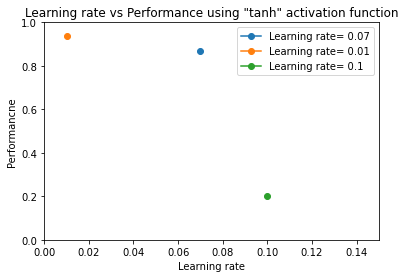

In [19]:
plt.plot(first_lr, first_per, marker = 'o')                       # plotting a point of first learning rate and performance  
plt.plot(second_lr,second_per, marker = 'o')                      # plotting a point of second learning rate and performance
plt.plot(third_lr,third_per, marker = 'o')                        # plotting a point of third learning rate and performance
plt.xlabel('Learning rate')                                       # defining x axis label                     
plt.ylabel('Performancne')                                        # defining y axis label                        
plt.title('Learning rate vs Performance using "tanh" activation function')               
plt.xlim(0, 0.15), plt.ylim(0, 1)
plt.legend(["Learning rate= 0.07", "Learning rate= 0.01", "Learning rate= 0.1"], loc ="upper right")
plt.show()

What are your observations?

Was the comparison fair? If not explain what needed to be done to make the comparison fair.

**Observations:-**

Activation function:-An activation function in a neural network defines how the weighted sum of the input is transformed into an output from a node or nodes in a layer of the network.

I have taken 0.07 learning rate and 5 epochs for this task, because my maximum performance occurs at this combination. 
I have observed that, while using 'tanh' avtivation function and above parameters, performance is obtained 0.8678 which is less less than earlier 3 layer ANN with 'sigmoid' activation function which is 0.9768. Thus, comparision of both ANN, for this parameters, is not fair. 

**To make a Comparision fair:-**

(1) Learning rate can be changed while using different activation function. Thus, it can give an improvement in the performance. For ex. I have changed learning rate 0.01 and 0.1 from 0.07 and it gives 0.9353, 0.2007 performance respectively for ANN using 'tanh'activation function. Here lower learning rates results into high performance and hence, it can be said that, different activation function requires different learning rate and epoch combination to make the performance better. 

(2) Another point is, we should check performance for every combination of learning rate and epoch and then we should findout our best combination according to the highest performance and time taken like we did in task 3. 



## Task 6: More Layer (5 Points)

Add a second hidden layer to our (original) neural network.    
Compare the ANN with at least 5 different eamples to a three layer network with the same (total) number of hidden nodes. Choose the other parameters from your experience.

Code:

In [39]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special 

# class definition for the core structure
class neuralNetwork2:
    
    # initialise the neural network
    def __init__(self, inputnodes1, hiddennodes1, hiddennodes2, outputnodes1, learn_rate):
        # set number of nodes in each input, hidden, output layer
        self.ipnodes = inputnodes1
        self.h1nodes = hiddennodes1
        self.h2nodes = hiddennodes2
        self.opnodes = outputnodes1
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.w_iphid1 = numpy.random.normal(0.0, pow(self.ipnodes, -0.5), (self.h1nodes, self.ipnodes))
        self.w_hid1hid2 = numpy.random.normal(0.0, pow(self.h1nodes, -0.5), (self.h2nodes, self.h1nodes))
        self.w_hid2op = numpy.random.normal(0.0, pow(self.h2nodes, -0.5), (self.opnodes, self.h2nodes))

        # learning rate
        self.learningrate1 = learn_rate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass


    
    # train the neural network
    def train(self, ip_list, targetsvalue_list):
        # convert inputs list to 2d array
        ip_value = numpy.array(ip_list, ndmin=2).T
        target_value = numpy.array(targetsvalue_list, ndmin=2).T
        
        # calculate signals into hidden layer1
        hid1_ip = numpy.dot(self.w_iphid1, ip_value)
        # calculate the signals emerging from hidden layer1
        hid1_op = self.activation_function(hid1_ip)
        
        # calculate signals into hidden layer2
        hid2_ip = numpy.dot(self.w_hid1hid2, hid1_op)
        # calculate the signals emerging from hidden layer1
        hid2_op = self.activation_function(hid2_ip)
        
        # calculate signals into final output layer
        final_ip = numpy.dot(self.w_hid2op, hid2_op)
        # calculate the signals emerging from final output layer
        final_op = self.activation_function(final_ip)
        
        # output layer error is the (target - actual)
        op_errors = target_value - final_op
        
        # hidden layer 2 error is the output_errors, split by weights, recombined at hidden nodes
        hid2_errors = numpy.dot(self.w_hid2op.T, op_errors) 
        
        # hidden layer 1 error is the output_errors, split by weights, recombined at hidden nodes
        hid1_errors = numpy.dot(self.w_hid1hid2.T, hid2_errors)
        
        # update the weights for the links between the hidden layer 2 and output layers
        self.w_hid2op += self.learningrate1 * numpy.dot((op_errors * final_op * (1.0 - final_op)), numpy.transpose(hid2_op))
        
        # update the weights for the links between the hidden layer 1 and hidden layer 2
        self.w_hid1hid2 += self.learningrate1 * numpy.dot((hid2_errors * hid2_op * (1.0 - hid2_op)), numpy.transpose(hid1_op))
        
        # update the weights for the links between the input and hidden layers 1
        self.w_iphid1 += self.learningrate1 * numpy.dot((hid1_errors * hid1_op * (1.0 - hid1_op)), numpy.transpose(ip_value))
        
        pass

    
    # query the neural network
    def query(self, ip_list):
        # convert inputs list to 2d array
        ip_value = numpy.array(ip_list, ndmin=2).T
        
        # calculate signals into hidden layer 1
        hid1_ip = numpy.dot(self.w_iphid1, ip_value)
        # calculate the signals emerging from hidden layer
        hid1_op = self.activation_function(hid1_ip)
        
        # calculate signals into hidden layer 2
        hid2_ip = numpy.dot(self.w_hid1hid2, hid1_op)
        # calculate the signals emerging from hidden layer
        hid2_op = self.activation_function(hid2_ip)
        
        # calculate signals into final output layer
        final_ip = numpy.dot(self.w_hid2op, hid2_op)
        # calculate the signals emerging from final output layer
        final_op = self.activation_function(final_ip)
        
        return final_op

In [40]:
import time 

def myfunction_task6(learningrate, epoch_task6, instance_name, combi1, combi2, combi3, combi4, combi5, combi6):
    
    hid_combi = [(combi1), (combi2), (combi3), (combi4), (combi5), (combi6)]  #container of hidden nodes combination as tuple

    hidden_layer1_nodes = [x[0] for x in hid_combi]                           #storing first value of every combination in a List
    hidden_layer2_nodes = [x[1] for x in hid_combi]                           #storing second value of every combination in a List

    t20 = time.time()
    # number of input and output nodes
    inp_nodes = 784
    oup_nodes = 10

    # learning rate
    lr = learningrate                                                         # value of learning rate

    perfo_array_oneD = []                                                     # initialization of array which will store performances

    for m in range(len(hid_combi)):   
        # create instance of neural network
        t22 = time.time()
        
        # I have used different name of every instance of neural network to prevent data overwriting!
        instance_name = neuralNetwork2(inp_nodes,hidden_layer1_nodes[m],hidden_layer2_nodes[m],oup_nodes, lr)

        # load the mnist training data CSV file into a list
        training_data_file = open("mnist_train.csv", 'r')
        training_data_list = training_data_file.readlines()
        training_data_file.close()


        # train the neural network

        # epochs is the number of times the training data set is used for training
        epochs = epoch_task6                                                  # value of epochs

        for e in range(epochs):
            # go through all records in the training data set
            for record in training_data_list:
                # split the record by the ',' commas
                all_values = record.split(',')
                # scale and shift the inputs
                ip_value = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
                # create the target output values (all 0.01, except the desired label which is 0.99)
                target_value = numpy.zeros(oup_nodes) + 0.01
                # all_values[0] is the target label for this record
                target_value[int(all_values[0])] = 0.99
                instance_name.train(ip_value, target_value)
                pass
            pass

        # Loading the test data
        # load the mnist test data CSV file into a list
        test_data_file = open("mnist_test.csv", 'r')
        test_data_list = test_data_file.readlines()
        test_data_file.close()

        # scorecard for how well the network performs, initially empty
        scorecard = []

        # go through all the records in the test data set
        for record in test_data_list:
            # split the record by the ',' commas
            all_values = record.split(',')
            # correct answer is first value
            correct_label = int(all_values[0])
            # scale and shift the inputs
            ip_value = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # query the network
            op_value = instance_name.query(ip_value)
            # the index of the highest value corresponds to the label
            label = numpy.argmax(op_value)
            # append correct or incorrect to list
            if (label == correct_label):
                #print(f"The number {label} was corrctly detected with a score of {op_value[label]}")
                # network's answer matches correct answer, add 1 to scorecard
                scorecard.append(1)
            else:
                #print(f"The number {label} was incorrctly detected with a score of {op_value[label]}, was {correct_label}")
                # network's answer doesn't match correct answer, add 0 to scorecard
                scorecard.append(0)
                pass

            pass

        # calculate the performance score, the fraction of correct answers
        scorecard_array = numpy.asarray(scorecard)
        performance = scorecard_array.sum() / scorecard_array.size
        #print ("performance = ", performance)
        perfo_array_oneD.append(performance)                                      # appending performance values into array
        t23 = time.time()

        print('-------------------------------------------------------------------------------')
        print('Hidden Nodes in 1st and 2nd layer respectively:', hid_combi[m])
        print('Performance is:', performance)
        print('Time taken to calculate performance is:', round(t23 - t22,2))
        print('-------------------------------------------------------------------------------')

    
    print('Learning rate is:', lr)
    print('Epochs is:', epochs)
    print('Hidden layer combination is:', hid_combi)
    print('Performance accordingly given combination is:', perfo_array_oneD)
    myfunction_task6.per = perfo_array_oneD
    myfunction_task6.hid_combi = hid_combi

    t21 = time.time()
    print('Time to complete whole task is:', round(t21-t20,2), 'seconds.')
    
    return myfunction_task6.hid_combi, myfunction_task6.per



In [41]:
# applying 0.01 learning rate in 4 Layer Neural Network to check its performance
myfunction_task6(0.07, 5, 'n_8', (300,100), (150, 50), (200, 100), (120, 280), (20,180), (50, 250))

-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (300, 100)
Performance is: 0.9528
Time taken to calculate performance is: 426.46
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (150, 50)
Performance is: 0.9387
Time taken to calculate performance is: 135.63
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (200, 100)
Performance is: 0.948
Time taken to calculate performance is: 309.76
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (120, 2

([(300, 100), (150, 50), (200, 100), (120, 280), (20, 180), (50, 250)],
 [0.9528, 0.9387, 0.948, 0.9423, 0.8908, 0.9227])

What are your observations?

Was the comparison fair? If not explain what needed to be done to make the comparison fair.

**Obesrvation, Comparision and explaination:-**

(1) I have observed and compare the performances of 4 and 3 layer ANN which I have shown below,
    Learning rate 0.07
    Epoch 5
    
    Hidden Nodes combination     Performance in 4 layer ANN  Performance in 3 layer ANN
    (300,100)                     0.9528                     0.9759 with 400 nodes  (Got it from task 4)
    (120,280)                     0.9423                     0.9759 with 400 nodes  (Got it from task 4)
    (200,100)                     0.9480                     0.9736 with 300 nodes  (Got it from task 4)
    (50,250)                      0.9227                     0.9736 with 300 nodes  (Got it from task 4)
    (150,50)                      0.9287                     0.9768 with 200 nodes  (Got it from task 3)
    (20,180)                      0.8908                     0.9768 with 200 nodes  (Got it from task 3)
    
(2) It can be concluded from above that, 4 layer ANN gives lesser performance than 3 layer ANN for 0.07 learning rate and 5    epoch. Therefore, comparision of 3 and 4 layer ANN is not fair. 

(3) The reason for less performance for 4 layer ANN is, there is one additional hidden layer added and therefore, activation function becomes more complicated in back-propogation and learning of ANN slows down significantly in earlier layers and model turns in overfitting.

(4) Another observation is, for less number of hidden nodes in 1st layer than in 2nd layer takes less time to calculate the performance and also gives less performance as we can see the performance of hidden node combinations (120,280), (50,250), (20,180).

### Now I have choosed 0.01 learning rate for 3 and 4 layer neural network and have compared their performance below.

Applying 0.01 learning rate in 4 Layer Neural Network to check its performance

In [42]:


myfunction_task6(0.01, 5, 'n_9', (300,100), (150, 50), (200, 100), (120, 280), (20,180), (50, 250))

-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (300, 100)
Performance is: 0.9702
Time taken to calculate performance is: 420.2
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (150, 50)
Performance is: 0.9689
Time taken to calculate performance is: 135.68
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (200, 100)
Performance is: 0.9686
Time taken to calculate performance is: 310.06
-------------------------------------------------------------------------------
-------------------------------------------------------------------------------
Hidden Nodes in 1st and 2nd layer respectively: (120, 2

([(300, 100), (150, 50), (200, 100), (120, 280), (20, 180), (50, 250)],
 [0.9702, 0.9689, 0.9686, 0.9662, 0.9336, 0.9583])

Applying 0.01 learning rate in 3 Layer Neural Network to check its performance

In [45]:


myfunction_task1(784, 200, 10, 0.01, 5, 'n_10')

Performance is =  0.9537
Time for the completing whole task: 287.34 seconds


In [46]:
myfunction_task1(784, 300, 10, 0.01, 5, 'n_11')

Performance is =  0.9522
Time for the completing whole task: 400.46 seconds


In [47]:
myfunction_task1(784, 400, 10, 0.01, 5, 'n_12')

Performance is =  0.9508
Time for the completing whole task: 503.82 seconds


**Discussion:-**

I have changed learning rate from 0.07 to 0.01 and compared the performance of 3 layer and 4 layer ANN which I have shown below,

    Hidden Nodes combination    Performance in 4 layer ANN    Performance in 3 layer ANN
    (300,100)                     0.9702                   0.9508 with 400 nodes  (Got it from running a function of task 1)
    (120,280)                     0.9662                   0.9508 with 400 nodes  (Got it from running a function of task 1)
    (200,100)                     0.9686                   0.9522 with 300 nodes  (Got it from running a function of task 1)
    (50,250)                      0.9583                   0.9522 with 300 nodes  (Got it from running a function of task 1)
    (150,50)                      0.9689                   0.9537 with 200 nodes  (Got it from running a function of task 1)
    (20,180)                      0.9336                   0.9537 with 200 nodes  (Got it from running a function of task 1)
    
so from above results, we can see that, using 0.01 learning rate, performance improves for 4 layer ANN and shows higher than 3 layer ANN performance.  

<function matplotlib.pyplot.show(close=None, block=None)>

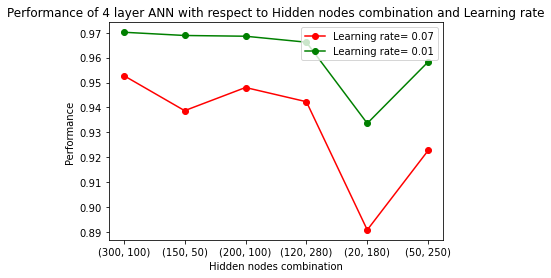

In [48]:
#performance array of 4 layer ANN using 0.07 learning rate = [0.9528, 0.9387, 0.948, 0.9423, 0.8908, 0.9227]
#performance array of 4 layer ANN using 0.01 learning rate = [0.9702, 0.9689, 0.9686, 0.9662, 0.9336, 0.9583]

performanceArr1= [0.9528, 0.9387, 0.948, 0.9423, 0.8908, 0.9227]
performanceArr2 = [0.9702, 0.9689, 0.9686, 0.9662, 0.9336, 0.9583]
plt.plot(['(300, 100)', '(150, 50)', '(200, 100)', '(120, 280)', '(20, 180)', '(50, 250)'], performanceArr1, 'r', marker = 'o')
plt.plot(['(300, 100)', '(150, 50)', '(200, 100)', '(120, 280)', '(20, 180)', '(50, 250)'], performanceArr2, 'g', marker = 'o')
plt.xlabel('Hidden nodes combination')
plt.ylabel('Performance')
plt.legend(["Learning rate= 0.07", "Learning rate= 0.01"], loc ="upper right") 
plt.title('Performance of 4 layer ANN with respect to Hidden nodes combination and Learning rate')
plt.show

From above figure, it can be seen that, lower learning rate gives better performance when using two Hidden Layer in ANN.

**Concluded points:-**

(1) For this simple classification problem, 4 layer ANN does not give better performance than 3 layer ANN.

(2) **To make the comparision fair**, lower learning rate must be chosen while using morethan one hidden layer ANN and hence, it can give the better performance than only one hidden layer ANN. Every possible combination of learning rate and epoch must be tried and should be checked the performance and time taken to findout the best combination according to the performance and time like we did in task 3.

(3) 4 Layer ANN gives lower performance when using lower number of hidden nodes in 1st layer than in 2nd. Hence, hidden nodes in 1st layer must be heigher than in 2nd hidden layer to obtain higher performance. 